<a href="https://colab.research.google.com/github/judgeee-wase/jg_file/blob/master/ommc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Google colaboratry を使って機械学習の一部に触れてみよう**

***＊[重要]筆者はにわかなので違っていたらご指摘いただけると幸いです***

[目次]


1.   数学知識(簡単verのみ対応)
2.   ニューラルネットワークの概要
1.   ニューラルネットワークっぽいのを作って２値分類　単層ver
2.   ニューラルネットワークっぽいのを作って２値分類　複層ver
1.   機械学習もどき
2.   ぜ～んぶライブラリにまかしちゃうんだから！
1.   最後に














**１．数学知識**

数学的な知識についてですが書くことはわかっているのですが卒論が忙しいのとここに書くにはスペースが足りないので省略します。
よく、数学の教科書は解答が「略」になっていますよね。それと同じです(暴論)

今回「活性化関数」としてシグモイド関数を用いるので以下で軽く予習しておいてください。
あとは正規分布とかの面積=確率の概念あたりをさらっとやっておけばオッケーです。
まずは僕と一緒に慣れていくことが今回の目標です。
細かい原理やより詳しく実用的な使用は今後ご自身で進めてみてください
以下にシグモイド関数についての参考ページを載せておきます。

[シグモイド関数](https://atmarkit.itmedia.co.jp/ait/articles/2003/04/news021.html)

**２．ニューラルネットワークの概要**

さてニューラルネットワークとは何でしょうか
以下のサイトを見て勉強しましょう
イメージとして以下を想像できればまぁ及第点です

本当はもっと複雑なんですけどもう個人の頑張りに委ねます

[ニューラルネットワーク-Wikipedia](https://ja.wikipedia.org/wiki/%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF)

[ニューラルネットワークとは](https://udemy.benesse.co.jp/data-science/ai/neural-network.html)


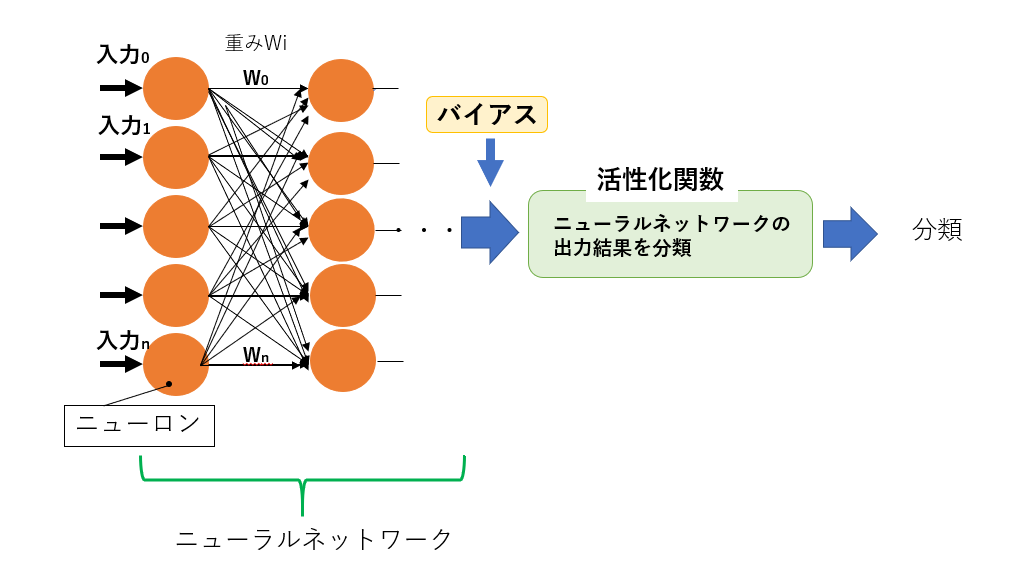

**ニューラルネットワークっぽいのを作って２値分類　単層ver**

さて早速ニューラルネットワークを実装して2値の分類を行いましょう。

まずここで、一つ注意をしておきます。人の手で簡単に実装できるのはまぁ単層のニューラルネットワークです。
だって、バイアスや重みを調節するのだるいですし。
そこで単一ニューロンで分類を行ってみます。
先程勉強したシグモイド関数ですが、(0,0.5)の座標を境に点対称な形をしています。これが意味するのはy軸を境にした同一の確率範囲を2つ有しているということです。

....僕の説明がへたくそなので伝わらないかもですが、結論として

「シグモイド関数は二値を分類する活性化関数として使いやすい」

のでシグモイド関数を使って、アヤメの分類を行ってみたいと思います。
今回使うデータセットのドキュメントは以下のリンクに貼っておきます。

[アヤメデータセット](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

では早速やって行きましょう。


まずはデータセットが取得できているかを確認します。

いきなりすべてのプログラムを組むのは不可能ですし非効率的です。
できることを積み重ねていけば大きなものができます。
「ctrl+Enter」で以下のプログラムを実行できます

In [ ]:
import numpy as np #配列操作のnumpy
import matplotlib as plt #グラフ描画のmatplotlib
import pandas as pd
from sklearn import datasets #sckit learnのデータセットを持ってくる

#<シグモイド関数の定義>########################
def sigmoid(x):
  return 1.0/(1.0+np.exp(-x))
###############################################

dataset=datasets.load_iris()#アヤメに関するデータを取得
print(dataset.feature_names)#特徴量の名前を確認
print(dataset.data.shape)

上記のコードの出力結果のうち特徴量に関して「sepal」と「petal」はそれぞれ「がく」「花弁」です。
ここで特徴量が「がく」と「花弁」それぞれに「長さ」と「幅」の合計4種類のデータが150個あるということが確認できました。
このあと使うのは150このうち最初の100個だけです。理由として今回は2値を分類するためです。(アヤメのデータには3種類のデータが存在している)

データを扱う際には一旦散布図などでその傾向をつかんでおくと傾向をつかめることがあります。
そこで次にこれらのデータをグラフで可視化してみます。

In [ ]:
import numpy as np #配列操作のnumpy
import matplotlib as plt #グラフ描画のmatplotlib
import pandas as pd
from sklearn import datasets #sckit learnのデータセットを持ってくる

#<シグモイド関数の定義>########################
def sigmoid(x):
  return 1.0/(1.0+np.exp(-x))
###############################################

dataset=datasets.load_iris()#アヤメに関するデータセットを取得
dataset_1=dataset.data[:50]#グループ１のアヤメの情報
dataset_2=dataset.data[50:100]#グループ２のアヤメの情報

#各データ要素を取得
sepal_length1=dataset_1[:,0]
sepal_length2=dataset_2[:,0]

sepal_width1=dataset_1[:,1]
sepal_width2=dataset_2[:,1]

petal_length1=dataset_1[:,2]
petal_length2=dataset_2[:,2]

petal_width1=dataset_1[:,3]
petal_width2=dataset_2[:,3]

plt.pyplot.scatter(sepal_length1, sepal_width1, label="Iris_1") 
plt.pyplot.scatter(sepal_length2, sepal_width2, label="Iris_2")
plt.pyplot.title("Sepal")
plt.pyplot.legend()
plt.pyplot.xlabel("Sepal length (cm)")
plt.pyplot.ylabel("Sepal width (cm)")
plt.pyplot.show()

plt.pyplot.scatter(petal_length1, petal_width1, label="Iris_1") 
plt.pyplot.scatter(petal_length2, petal_width2, label="Iris_2") 
plt.pyplot.title("Petal")
plt.pyplot.legend()
plt.pyplot.xlabel("Petal length (cm)")
plt.pyplot.ylabel("Petal width (cm)")
plt.pyplot.show()

出力結果を見るとどちらも重なりがないっすね。
そこで両方で単一ニューロンでの分類を行ってみましょう。
入力は平均からの差分でいれていきます。
興味があれば

「**バイアスと重み**」を変えてみてください。

実行してみると判別結果が変わるはずです

In [ ]:
import numpy as np #配列操作のnumpy
import matplotlib as plt #グラフ描画のmatplotlib
import pandas as pd
from sklearn import datasets #sckit learnのデータセットを持ってくる

#　シグモイド関数の定義　######################
def sigmoid(x):
  return 1.0/(1.0+np.exp(-x))
#　定義終了　##################################


#　ニューロンクラス定義　##################
class Neuron:
  def __init__(self):
    self.neuron_input=0.0
    self.neuron_output=0.0

  def make_neuron_input(self,input):
    self.neuron_input+=input
  
  def make_neuron_output(self):
    self.neuron_output=sigmoid(self.neuron_input)
    return self.neuron_output
  
  def all_reset(self):
    self.neuron_input=0.0
    self_neuron_output=0.0
#　定義終了　##############################


#　ニューラルネットワーククラス　############################################
class NeuralNetwork:
  def __init__(self):
    self.neuron=Neuron()
    self.weight=[0.4,-0.4] #好きに調整してみてください　<------
    self.bias=0.0          #好きに調整してみてください　<------
  
  def nn_output(self,input_list):
    self.neuron.all_reset()
    self.neuron.make_neuron_input(input_list[0]*self.weight[0])#sepal_lengthの処理
    self.neuron.make_neuron_input(input_list[1]*self.weight[1])#sepal_widthの処理
    self.neuron.make_neuron_input(self.bias)#バイアスの加算
    return self.neuron.make_neuron_output()
#　定義終了　####################################################################


#　入力データ準備開始　##############################################
dataset=datasets.load_iris() #アヤメに関するデータセットを取得
data=dataset.data[:100] #アヤメの情報を取得
sepal_length=data[:,0]
sepal_width=data[:,1]

sepal_length_ave=np.average(sepal_length)#sepal_length平均を作製
sepal_width_ave=np.average(sepal_width)#sepal_width平均を作製

#numpyにより配列の全要素から平均を除く
sepal_length-=sepal_length_ave
sepal_width-=sepal_width_ave

#inputlist =>形式は [sepal_length,sepal_width]
input_list=[]
for i in range(100):
  input_list.append([sepal_length[i],sepal_width[i]])

#データの形確認用
#print(input_list)
#print(input_list.shape)

#判別結果を格納するlist
group_1=[[],[]]
group_2=[[],[]]

#　準備終了　########################################################


#　判別開始　##############################################################
my_neuralnetwork=NeuralNetwork()

for temp_input in input_list:#temp_input
  if my_neuralnetwork.nn_output(temp_input)<0.5:
    group_1[0].append(temp_input[0]+sepal_length_ave)
    group_1[1].append(temp_input[1]+sepal_width_ave)

  else:
    group_2[0].append(temp_input[0]+sepal_length_ave)
    group_2[1].append(temp_input[1]+sepal_width_ave)

#描画
plt.pyplot.scatter(group_1[0],group_1[1] , label="Group_1") 
plt.pyplot.scatter(group_2[0],group_2[1] , label="Group_2") 
plt.pyplot.title("Estimated Results")
plt.pyplot.legend()
plt.pyplot.xlabel("Sepal length (cm)")
plt.pyplot.ylabel("Sepal width (cm)")
plt.pyplot.show()
#　判別終了　#############################################################

#　正解のグラフ　#######################################
dataset_1=dataset.data[:50]#グループ１のアヤメの情報
dataset_2=dataset.data[50:100]#グループ２のアヤメの情報

#各データ要素を取得
sepal_length1=dataset_1[:,0]
sepal_length2=dataset_2[:,0]
sepal_width1=dataset_1[:,1]
sepal_width2=dataset_2[:,1]

#描画
plt.pyplot.scatter(sepal_length1, sepal_width1, label="Iris_1") 
plt.pyplot.scatter(sepal_length2, sepal_width2, label="Iris_2") 
plt.pyplot.title("Answer")
plt.pyplot.legend()
plt.pyplot.xlabel("Sepal length (cm)")
plt.pyplot.ylabel("Sepal width (cm)")
plt.pyplot.show()
########################################################

In [ ]:
#以下にてお好きに実行してみてください


次にpetal_lengthとpetal_widthで分類してみましょう

In [ ]:
import numpy as np #配列操作のnumpy
import matplotlib as plt #グラフ描画のmatplotlib
import pandas as pd
from sklearn import datasets #sckit learnのデータセットを持ってくる

#　シグモイド関数の定義　######################
def sigmoid(x):
  return 1.0/(1.0+np.exp(-x))
#　定義終了　##################################


#　ニューロンクラス定義　##################
class Neuron:
  def __init__(self):
    self.neuron_input=0.0
    self.neuron_output=0.0

  def make_neuron_input(self,input):
    self.neuron_input+=input
  
  def make_neuron_output(self):
    self.neuron_output=sigmoid(self.neuron_input)
    return self.neuron_output
  
  def all_reset(self):
    self.neuron_input=0.0
    self_neuron_output=0.0
#　定義終了　##############################


#　疑似ニューラルネットワーククラス　############################################
class NeuralNetwork:
  def __init__(self):
    self.neuron=Neuron()
    self.weight=[0.6,-0.2] #好きに調整してみてください　<---------
    self.bias=0.0          #好きに調整してみてください　<---------
  
  def nn_output(self,input_list):
    self.neuron.all_reset()
    self.neuron.make_neuron_input(input_list[0]*self.weight[0])#sepal_lengthの処理
    self.neuron.make_neuron_input(input_list[1]*self.weight[1])#sepal_widthの処理
    self.neuron.make_neuron_input(self.bias)#バイアスの加算
    return self.neuron.make_neuron_output()
#　定義終了　####################################################################


#　入力データ準備開始　##############################################
dataset=datasets.load_iris() #アヤメに関するデータセットを取得
data=dataset.data[:100] #アヤメの情報を取得
petal_length=data[:,2]
petal_width=data[:,3]

petal_length_ave=np.average(petal_length)#sepal_length平均を作製
petal_width_ave=np.average(petal_width)#sepal_width平均を作製

#numpyにより配列の全要素から平均を除く
petal_length-=petal_length_ave
petal_width-=petal_width_ave

#inputlist =>形式は [petal_length,petal_width]
input_list=[]
for i in range(100):
  input_list.append([petal_length[i],petal_width[i]])

#データの形確認用
#print(input_list)
#print(input_list.shape)

#判別結果を格納するlist
group_1=[[],[]]
group_2=[[],[]]

#　準備終了　########################################################


#　判別開始　##############################################################
my_neuralnetwork=NeuralNetwork()

for temp_input in input_list:#temp_input
  if my_neuralnetwork.nn_output(temp_input)<0.5:
    group_1[0].append(temp_input[0]+petal_length_ave)
    group_1[1].append(temp_input[1]+petal_width_ave)

  else:
    group_2[0].append(temp_input[0]+petal_length_ave)
    group_2[1].append(temp_input[1]+petal_width_ave)

#描画
plt.pyplot.scatter(group_1[0],group_1[1] , label="Group_1") 
plt.pyplot.scatter(group_2[0],group_2[1] , label="Group_2") 
plt.pyplot.title("Estimated Results")
plt.pyplot.legend()
plt.pyplot.xlabel("Petal length (cm)")
plt.pyplot.ylabel("Petal width (cm)")
plt.pyplot.show()
#　判別終了　#############################################################

#　正解のグラフ　#######################################
dataset_1=dataset.data[:50]#グループ１のアヤメの情報
dataset_2=dataset.data[50:100]#グループ２のアヤメの情報

#各データ要素を取得
petal_length1=dataset_1[:,2]
petal_length2=dataset_2[:,2]
petal_width1=dataset_1[:,3]
petal_width2=dataset_2[:,3]

#描画
plt.pyplot.scatter(petal_length1, petal_width1, label="Iris_1") 
plt.pyplot.scatter(petal_length2, petal_width2, label="Iris_2") 
plt.pyplot.title("Answer")
plt.pyplot.legend()
plt.pyplot.xlabel("Petal length [cm]")
plt.pyplot.ylabel("Petal width [cm]")
plt.pyplot.show()
########################################################

In [ ]:
#以下にてお好きに実行してみてください


これで二値の分類を行うことに成功しました。
これがもっともっと複雑に絡んでいくことで
多層のニューラルネットワークを構築、
更に複雑で難解な判別までもができるようになっていきます。

**4.ニューラルネットワークっぽいのを作って２値分類　複数層ver**

先程までは単一ニューロンしかないので実質ニューロンがそのままニューラルネットワークだったわけです。

それでは次に少し層を増やしてみましょう。今回はsepalのみです

3層以上に増やすとパラメータである重みとバイアスの調整を行うのが限界なので
増やすといっても一層です。
以下、イメージです。

実は今回このイメージなしで実装しようとしたらこんがらがって沼りました(マジで)
同じようなやつを実装するなら見ることをお勧めします。


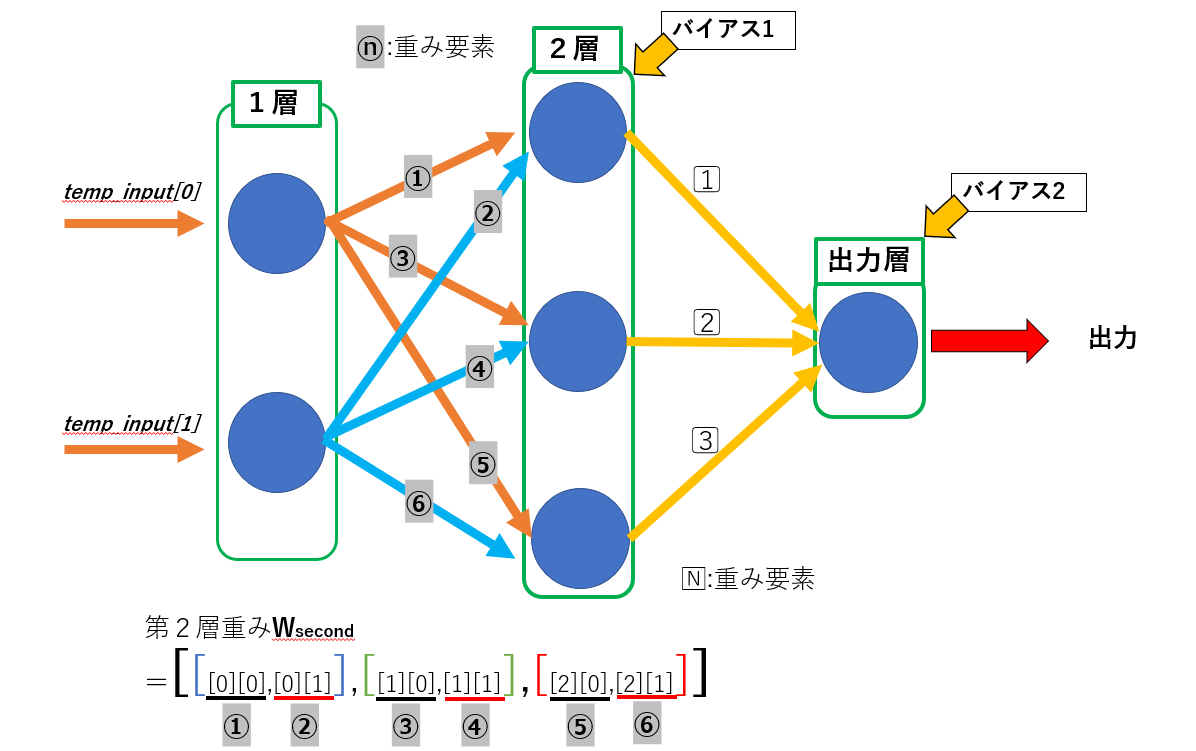

まずはパラメータを調整してない状態でのコードです


In [ ]:
import numpy as np #配列操作のnumpy
import matplotlib as plt #グラフ描画のmatplotlib
import pandas as pd
from sklearn import datasets #sckit learnのデータセットを持ってくる

#　シグモイド関数の定義　######################
def sigmoid(x):
  return 1.0/(1.0+np.exp(-x))
#　定義終了　##################################


#　ニューロンクラス定義　##################
class Neuron:
  def __init__(self):
    self.neuron_input=0.0
    self.neuron_output=0.0

  def make_neuron_input(self,input):
    self.neuron_input+=input
  
  def make_neuron_output(self):
    self.neuron_output=sigmoid(self.neuron_input)
    return self.neuron_output
  
  def all_reset(self):
    self.neuron_input=0.0
    self_neuron_output=0.0
#　定義終了　##############################


#　ニューラルネットワーククラス　############################################
class NeuralNetwork:
  def __init__(self):
    #パラメータ設定
    self.second_layer_weight=[[0.4,0.4],[0.4,0.4],[0.4,0.4]]  #したいなら好きに調整してみてください　<-----
    self.second_layer_bias=[0.0,0.0,0.0]                      #がちでしたいなら好きに調整してみてください　<-----
    self.final_layer_weight=[0.4,0.4,0.4]                     #マジでがちでやりたいなら好きに調整してみてください　<-----
    self.final_layer_bias=0.0                                 #本当にガチでスーパー本気でしたいなら好きに調整してみてください　<-----

    # 各層の宣言
    self.first_layer = [0.0, 0.0]
    self.second_layer = [Neuron(), Neuron(),Neuron()]
    self.final_layer = [Neuron()]

  def nn_output(self,input_list):
    #初期化
    self.first_layer[0]=input_list[0]
    self.first_layer[1]=input_list[1]
    for i in range(3):
     self.second_layer[i].all_reset()
    self.final_layer[0].all_reset()

  #計算開始
  #第二層
    self.second_layer[0].make_neuron_input(self.first_layer[0]*self.second_layer_weight[0][0]+self.first_layer[1]*self.second_layer_weight[0][1])
    self.second_layer[1].make_neuron_input(self.first_layer[0]*self.second_layer_weight[1][0]+self.first_layer[1]*self.second_layer_weight[1][1])
    self.second_layer[2].make_neuron_input(self.first_layer[0]*self.second_layer_weight[2][0]+self.first_layer[1]*self.second_layer_weight[2][1])   
    #バイアス
    self.second_layer[0].make_neuron_input(self.second_layer_bias[0])
    self.second_layer[1].make_neuron_input(self.second_layer_bias[1])
    self.second_layer[2].make_neuron_input(self.second_layer_bias[2])

  #第三層
    self.final_layer[0].make_neuron_input(self.second_layer[0].neuron_input*self.final_layer_weight[0])
    self.final_layer[0].make_neuron_input(self.second_layer[1].neuron_input*self.final_layer_weight[1])
    self.final_layer[0].make_neuron_input(self.second_layer[2].neuron_input*self.final_layer_weight[2])
    #バイアス
    self.final_layer[0].make_neuron_input(self.final_layer_bias)
    return self.final_layer[0].make_neuron_output()
  #計算終了

#　定義終了　####################################################################


#　入力データ準備開始　##############################################
dataset=datasets.load_iris() #アヤメに関するデータセットを取得
data=dataset.data[:100] #アヤメの情報を取得
sepal_length=data[:,0]
sepal_width=data[:,1]

sepal_length_ave=np.average(sepal_length)#sepal_length平均を作製
sepal_width_ave=np.average(sepal_width)#sepal_width平均を作製

#numpyにより配列の全要素から平均を除く
sepal_length-=sepal_length_ave
sepal_width-=sepal_width_ave

#inputlist =>形式は [sepal_length,sepal_width]
input_list=[]
for i in range(100):
  input_list.append([sepal_length[i],sepal_width[i]])

#データの形確認用
#print(input_list)
#print(input_list.shape)

#判別結果を格納するlist
group_1=[[],[]]
group_2=[[],[]]

#　準備終了　########################################################


#　判別開始　##############################################################
my_neuralnetwork=NeuralNetwork()

for temp_input in input_list:#temp_input
  if my_neuralnetwork.nn_output(temp_input)<0.5:
    group_1[0].append(temp_input[0]+sepal_length_ave)
    group_1[1].append(temp_input[1]+sepal_width_ave)

  else:
    group_2[0].append(temp_input[0]+sepal_length_ave)
    group_2[1].append(temp_input[1]+sepal_width_ave)

#描画
plt.pyplot.scatter(group_1[0],group_1[1] , label="Group_1") 
plt.pyplot.scatter(group_2[0],group_2[1] , label="Group_2") 
plt.pyplot.title("Estimated Results")
plt.pyplot.legend()
plt.pyplot.xlabel("Sepal length [cm]")
plt.pyplot.ylabel("Sepal width [cm]")
plt.pyplot.show()
#　判別終了　#############################################################

#　正解のグラフ　#######################################
dataset_1=dataset.data[:50]#グループ１のアヤメの情報
dataset_2=dataset.data[50:100]#グループ２のアヤメの情報

#各データ要素を取得
sepal_length1=dataset_1[:,0]
sepal_length2=dataset_2[:,0]
sepal_width1=dataset_1[:,1]
sepal_width2=dataset_2[:,1]

#描画
plt.pyplot.scatter(sepal_length1, sepal_width1, label="Iris_1") 
plt.pyplot.scatter(sepal_length2, sepal_width2, label="Iris_2") 
plt.pyplot.title("Answer")
plt.pyplot.legend()
plt.pyplot.xlabel("Sepal length [cm]")
plt.pyplot.ylabel("Sepal width [cm]")
plt.pyplot.show()
########################################################

In [ ]:
#以下にてお好きに実行してみてください

まぁ全然判別が成功してませんね。

ここからパラメータをチューニングしてみた結果です。
チューニングといっても手探りで適当に10分ぐらいやってみただけですので
これが入力に対して今後きちんと作用するのかはわかりまペン(古い)

とりあえずこのデータセットに対してはうまく作用する程度のチューニングです


In [ ]:
import numpy as np #配列操作のnumpy
import matplotlib as plt #グラフ描画のmatplotlib
import pandas as pd
from sklearn import datasets #sckit learnのデータセットを持ってくる

#　シグモイド関数の定義　######################
def sigmoid(x):
  return 1.0/(1.0+np.exp(-x))
#　定義終了　##################################


#　ニューロンクラス定義　##################
class Neuron:
  def __init__(self):
    self.neuron_input=0.0
    self.neuron_output=0.0

  def make_neuron_input(self,input):
    self.neuron_input+=input
  
  def make_neuron_output(self):
    self.neuron_output=sigmoid(self.neuron_input)
    return self.neuron_output
  
  def all_reset(self):
    self.neuron_input=0.0
    self_neuron_output=0.0
#　定義終了　##############################


#　ニューラルネットワーククラス　############################################
class NeuralNetwork:
  def __init__(self):
    #パラメータ設定
    self.second_layer_weight=[[0.8,-0.5],[-0.4,-0.2],[0.6,-0.2]]  
    self.second_layer_bias=[0.0,0.0,0.05]                       
    self.final_layer_weight=[0.3,0.2,0.2]                      
    self.final_layer_bias=0.0                  

    # 各層の宣言
    self.first_layer = [0.0, 0.0]
    self.second_layer = [Neuron(), Neuron(),Neuron()]
    self.final_layer = [Neuron()]

  def nn_output(self,input_list):
    #初期化
    self.first_layer[0]=input_list[0]
    self.first_layer[1]=input_list[1]
    for i in range(3):
     self.second_layer[i].all_reset()
    self.final_layer[0].all_reset()

  #計算開始
  #第二層
    self.second_layer[0].make_neuron_input(self.first_layer[0]*self.second_layer_weight[0][0]+self.first_layer[1]*self.second_layer_weight[0][1])
    self.second_layer[1].make_neuron_input(self.first_layer[0]*self.second_layer_weight[1][0]+self.first_layer[1]*self.second_layer_weight[1][1])
    self.second_layer[2].make_neuron_input(self.first_layer[0]*self.second_layer_weight[2][0]+self.first_layer[1]*self.second_layer_weight[2][1])   
    #バイアス
    self.second_layer[0].make_neuron_input(self.second_layer_bias[0])
    self.second_layer[1].make_neuron_input(self.second_layer_bias[1])
    self.second_layer[2].make_neuron_input(self.second_layer_bias[2])

  #第三層
    self.final_layer[0].make_neuron_input(self.second_layer[0].neuron_input*self.final_layer_weight[0])
    self.final_layer[0].make_neuron_input(self.second_layer[1].neuron_input*self.final_layer_weight[1])
    self.final_layer[0].make_neuron_input(self.second_layer[2].neuron_input*self.final_layer_weight[2])
    #バイアス
    self.final_layer[0].make_neuron_input(self.final_layer_bias)
    return self.final_layer[0].make_neuron_output()
  #計算終了

#　定義終了　####################################################################


#　入力データ準備開始　##############################################
dataset=datasets.load_iris() #アヤメに関するデータセットを取得
data=dataset.data[:100] #アヤメの情報を取得
sepal_length=data[:,0]
sepal_width=data[:,1]

sepal_length_ave=np.average(sepal_length)#sepal_length平均を作製
sepal_width_ave=np.average(sepal_width)#sepal_width平均を作製

#numpyにより配列の全要素から平均を除く
sepal_length-=sepal_length_ave
sepal_width-=sepal_width_ave

#inputlist =>形式は [sepal_length,sepal_width]
input_list=[]
for i in range(100):
  input_list.append([sepal_length[i],sepal_width[i]])

#データの形確認用
#print(input_list)
#print(input_list.shape)

#判別結果を格納するlist
group_1=[[],[]]
group_2=[[],[]]

#　準備終了　########################################################


#　判別開始　##############################################################
my_neuralnetwork=NeuralNetwork()

for temp_input in input_list:#temp_input
  if my_neuralnetwork.nn_output(temp_input)<0.5:
    group_1[0].append(temp_input[0]+sepal_length_ave)
    group_1[1].append(temp_input[1]+sepal_width_ave)

  else:
    group_2[0].append(temp_input[0]+sepal_length_ave)
    group_2[1].append(temp_input[1]+sepal_width_ave)

#描画
plt.pyplot.scatter(group_1[0],group_1[1] , label="Group_1") 
plt.pyplot.scatter(group_2[0],group_2[1] , label="Group_2") 
plt.pyplot.title("Estimated Results")
plt.pyplot.legend()
plt.pyplot.xlabel("Sepal length [cm]")
plt.pyplot.ylabel("Sepal width [cm]")
plt.pyplot.show()
#　判別終了　#############################################################

#　正解のグラフ　#######################################
dataset_1=dataset.data[:50]#グループ１のアヤメの情報
dataset_2=dataset.data[50:100]#グループ２のアヤメの情報

#各データ要素を取得
sepal_length1=dataset_1[:,0]
sepal_length2=dataset_2[:,0]
sepal_width1=dataset_1[:,1]
sepal_width2=dataset_2[:,1]

#描画
plt.pyplot.scatter(sepal_length1, sepal_width1, label="Iris_1") 
plt.pyplot.scatter(sepal_length2, sepal_width2, label="Iris_2") 
plt.pyplot.title("Answer")
plt.pyplot.legend()
plt.pyplot.xlabel("Sepal length [cm]")
plt.pyplot.ylabel("Sepal width [cm]")
plt.pyplot.show()
########################################################

In [ ]:
#以下にてお好きに実行してみてください


…どうでしたか？パラメータ(重みとか)を調整するの、大変でしたよね？？(協調圧力)
このパラメータ、自動で調整されないかな....って思いましたよね。
パラメータを自動調整する、これから機械学習の始まりです。
学習とは出力と正解の誤差からそれを逆伝播していく、フィードバック制御的なことをしていくことです。
今回用いているシグモイド関数ではその微分は


**5.ぜ～んぶライブラリにまかしちゃうんだから！**

お次はもうちょい難しいパターンです。

乳がんの患者のがんが「良性(benign)」なのか、「悪性(malignant)」なのかを分類していこうという話です。
scikit-learnライブラリのデータセット内の乳がんに関するドキュメントは以下のリンクにあります。

[乳がんデータセット](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)

プログラムの解説は卒論(Apex)でいそがs(以下省略）


では早速print関数で取得できるデータを確認してみましょう。
ドキュメントによれば特徴量が30も!?あるので「*feature_names*」で名前を、「.shape」で取得できる配列の行・列を取得します
以下のセルで*「ctrl+Enter」*を押して実行してみて確認してみてください。

In [ ]:
import numpy as np #配列操作のnumpy
import matplotlib as plt #グラフ描画のmatplotlib
import pandas as pd
from sklearn import datasets #sckit learnのデータセットを持ってくる

dataset=datasets.load_breast_cancer()#データの読み込み

print(dataset.data.shape)#データセットのデータサイズの確認
print(dataset.feature_names)#特徴量の名前を確認

出力は下のようになりますよね。
```
'mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'
```
これを日本語に訳すと


```
「平均半径」「平均テクスチャ」「平均外周」「平均面積」
 「平均平滑性」「平均コンパクト性」「平均凹点」
 「凹点の平均」「対称性の平均」「フラクタル次元の平均」
 「半径の誤差」「テクスチャの誤差」「周囲の誤差」「面積の誤差」
 「滑らかさのエラー」 「コンパクトさのエラー」 「凹みのエラー」
 「凹点の誤差」 「対称性の誤差」 「フラクタル次元の誤差」
 「最悪の半径」「最悪のテクスチャ」「最悪の周囲」「最悪の面積」
 「最悪の滑らかさ」 「最悪のコンパクトさ」 「最悪の凹み」
 「最悪の凹み点」「最悪の対称性」 「最悪のフラクタル次元」
```

です。これで特徴量を確認しました。

また、dataのサイズからどのようなデータ構造かがわかりました。
これをわかりやすく表示してみましょう

In [ ]:
import numpy as np #配列操作のnumpy
import matplotlib as plt #グラフ描画のmatplotlib
import pandas as pd
from sklearn import datasets #sckit learnのデータセットを持ってくる

dataset=datasets.load_breast_cancer() #データの読み込み

data=dataset.data#乳がんdatasetsの中のdataにアクセス
feature_names=dataset.feature_names#乳がんdatasetsの中のfeature_namesにアクセス

data_table=pd.DataFrame(data,columns=feature_names)#データを表にまとめる
print(data_table)#視認性の確認


見やすくはなりましたが英語だと結局何かわからんですね

そこで「featurenames_jp」という日本語のリストを用意してそれを使ってみます。

In [ ]:
import numpy as np #配列操作のnumpy
import matplotlib as plt #グラフ描画のmatplotlib
import pandas as pd
from sklearn import datasets #sckit learnのデータセットを持ってくる

dataset=datasets.load_breast_cancer() #データの読み込み

data=dataset.data#乳がんdatasetsの中のdataにアクセス
feature_names=dataset.feature_names#乳がんdatasetsの中のfeature_namesにアクセス
#日本語版の特徴量
feature_names_jp=["平均半径","平均テクスチャ","平均外周 ","平均面積 ","平均平滑性 ","平均コンパクト性 ","平均凹点 ","凹点の平均 ","対称性の平均 ","フラクタル次元の平均","半径の誤差","テクスチャの誤差",
                  "周囲の誤差","面積の誤差","滑らかさのエラー","コンパクトさのエラー","凹みのエラー","凹点の誤差","対称性の誤差","フラクタル次元の誤差","最悪の半径","最悪のテクスチャ","最悪の周囲",
                  "最悪の面積","最悪の滑らかさ","最悪のコンパクトさ","最悪の凹み","最悪の凹み点","最悪の対称性","最悪のフラクタル次元"]

#日本語への変換                  
for i in range(30):
  feature_names[i]=feature_names_jp[i]

pd.set_option('display.unicode.east_asian_width', True)#これによって文字幅を調整(これしないと視認性が最悪に)
data_table=pd.DataFrame(data,columns=feature_names)#データを表にまとめる
print(data_table)#視認性の確認

ここからなんですが完全に置いてけぼりにするのでご自身で勉強してみて下さい


7.参考書籍


斎藤 康毅「ゼロから作るDeep Learning―Pythonで学ぶディープラーニングの理論と実装」(オライリージャパン出版)


我妻　幸長「はじめてのディープラーニング」(SB Creative出版)